<a href="https://colab.research.google.com/github/the-redlord/comp455/blob/master/Project/Copy_of_cifar10model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step 1: import

import tensorflow as tf
from tensorflow import keras

import os

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.layers import  Conv2D, MaxPooling2D

#Now the dataset
cifar10 = tf.keras.datasets.cifar10.load_data()

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())
tf.config.list_physical_devices('GPU')

TensorFlow version: 2.3.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? True


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
#Load the dataset
(X_Train, Y_Train),(X_Test, Y_Test) = cifar10

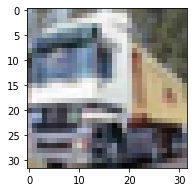

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(330+1+1)
plt.imshow(X_Train[1])
plt.show()

In [4]:
#Step 2: Data pre-processiing 


#Normalize the dataset
X_Train = X_Train.astype('float32')
X_Test = X_Test.astype('float32')

X_Train = X_Train/255.0
X_Test= X_Test/255.0

In [5]:
X_Train.shape

(50000, 32, 32, 3)

In [6]:
#Now one hot encoding on Y_Test

#convert vectors into Binary class matrices

Y_Train=keras.utils.to_categorical(Y_Train)
Y_Test=keras.utils.to_categorical(Y_Test)

In [7]:
cifar_classes = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

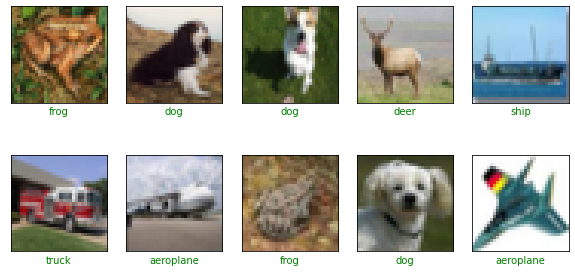

In [8]:
def show_random_examples(x,y,p):
  indices = np.random.choice(range(x.shape[0]),10,replace=False)
  x = x[indices]
  y = y[indices]
  p = p[indices]

  plt.figure(figsize=(10,5))
  for i in range(10):
    plt.subplot(2,5,1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])

    # show correct prediction in green and wrong in red
    col ='green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
    plt.xlabel(cifar_classes[np.argmax(p[i])],color=col)
  plt.show()

show_random_examples(X_Train,Y_Train,Y_Train)

In [9]:
#CHeck the shape of Y_Train
num_classes = Y_Train.shape[1]

In [10]:
#Step 3: Model Creation

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(32, 32, 3), padding = 'same', activation='relu',
          kernel_constraint = maxnorm(3)))

model.add(Dropout(0.2))
model.add(Conv2D (32, (3, 3) , activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation= 'softmax'))

#Configure the optimizer

sgd = SGD (learning_rate=0.01, momentum=0.9, decay= (0.01/25), nesterov = False)

#compile the model

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [12]:
model.fit(X_Train, Y_Train, validation_data=(X_Test,Y_Test), epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7030 - accuracy: 0.3840 - val_loss: 1.3526 - val_accuracy: 0.5173
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3391 - accuracy: 0.5171 - val_loss: 1.1858 - val_accuracy: 0.5775
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1858 - accuracy: 0.5771 - val_loss: 1.1057 - val_accuracy: 0.6084
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0722 - accuracy: 0.6191 - val_loss: 1.0655 - val_accuracy: 0.6266
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9783 - accuracy: 0.6518 - val_loss: 1.0014 - val_accuracy: 0.6455
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9037 - accuracy: 0.6805 - val_loss: 0.9885 - val_accuracy: 0.6548
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8327 - accuracy: 0.7060 - val_loss: 0.9670 - val_accuracy:

In [13]:
#Step 4: Evaluation
loss, accuracy_= model.evaluate(X_Test, Y_Test)
print("Accuracy of this program is: ", accuracy_*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.9218 - accuracy: 0.6829
Accuracy of this program is:  68.29000115394592


In [14]:
preds = model.predict(X_Test)

In [15]:
Y_Train.shape

(50000, 10)

In [16]:
preds.shape

(10000, 10)

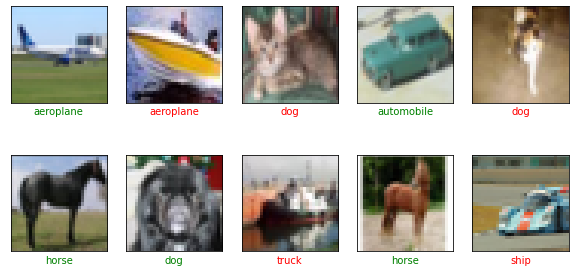

In [17]:
show_random_examples(X_Test,Y_Test,preds)